<a href="https://colab.research.google.com/github/ricardoricrob76/gerdau/blob/main/GERDAU_Aula_23_Sklearn_Modelo_Supervisionado_Regressao_Linear_3___Classifica%C3%A7%C3%A3o_Algoritmos_Celulares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# GERDAU - Treinamento InCompany
# Autor:  Profº - Ricardo Roberto de Lima - FABWORK
# Ciência de Dados com Python + Pandas, Numpy, SkLearning. Passageiros.csv
# Machine Learning - Aula 23 - Modelos Supervisionados 
# Algoritmo - Regressão Linear + Métricas e Alg. SVM - Classificação - Arvore + KNN + - Parte 3.

# Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

In [2]:
passageiros = pd.read_csv('Passageiros.csv')

# Adaptar para o Ambiente da GERDAU.
# import awswrangler as wr

# import boto3
# boto3.setup_default_session(region_name="us-east-2")

# Criar um Objeto do tipo DataFrame no Ambiente Big Data - Gerdau
# passageiros=wr.s3.read_csv('s3://gerdau-analytics/gdata/datascience/Passageiros.csv')

In [3]:
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

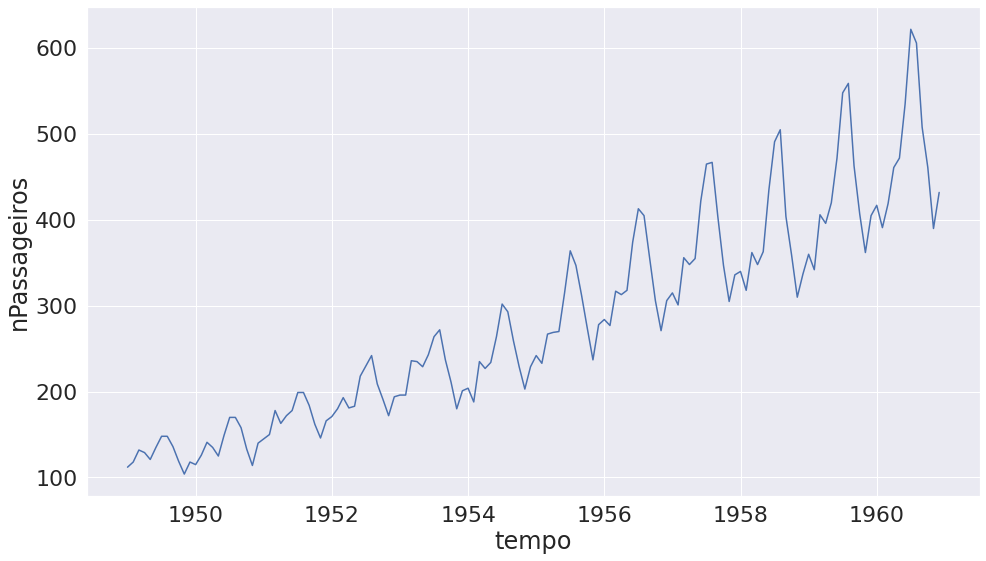

In [5]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [6]:
#Seleciona todas as colunas menos a última
Tempo = passageiros.iloc[:,:-1].values

In [7]:
nPassageiros = passageiros.iloc[:,1].values

In [8]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [9]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

In [10]:
from sklearn import linear_model

In [11]:
regressor = linear_model.LinearRegression()

In [12]:
#Ajustando a reta aos dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [14]:
import numpy as np

In [15]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


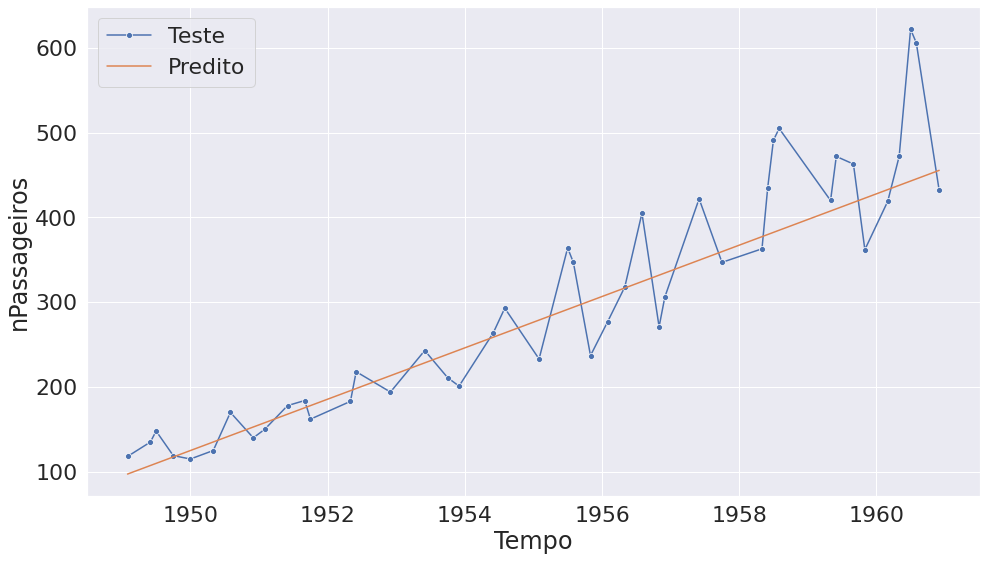

In [16]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

## Medindo a qualidade da regressão

In [17]:
#Extraindo o coeficiente angular da reta ajustada
regressor.coef_

array([30.28210504])

In [18]:
#Extraindo o coeficiente linear da reta ajustada
regressor.intercept_

-58925.121572111755

In [19]:
from sklearn.metrics import r2_score

In [20]:
# r2_score para a reta ajustada
r2_score(nPassageiros_teste,nPassageiros_predito)

0.8309083991604131

## SVM

In [21]:
from sklearn.svm import SVR

In [22]:
# Ajusta o modelo de regressão com a máquina de vetor de suporte
regressor_svr = SVR( C=1000000)
regressor_svr.fit(Tempo_treino,nPassageiros_treino)

SVR(C=1000000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [24]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito_svr,
             })

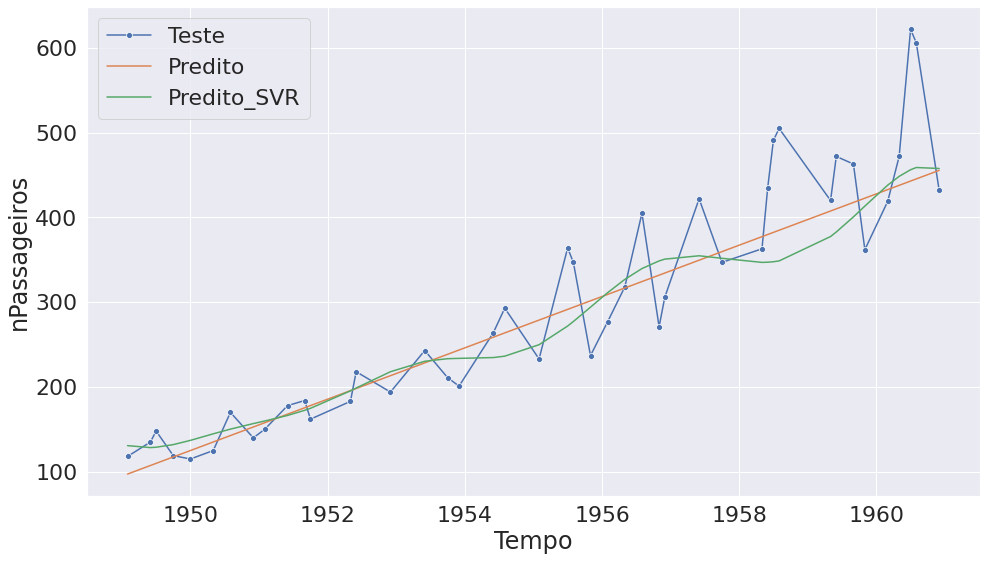

In [25]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito_svr, label = "Predito_SVR" )

In [26]:
# r2_score para a curva ajustada
r2_score(nPassageiros_teste,nPassageiros_predito_svr)

0.8006138794717538

# Classificação

## Árvores de decisão

In [83]:
#Carregando a nova base de dados
celular = pd.read_csv("Celular.csv",delimiter=",")

# Adaptar para o Ambiente da GERDAU.
# import awswrangler as wr

# import boto3
# boto3.setup_default_session(region_name="us-east-2")

# Criar um Objeto do tipo DataFrame no Ambiente Big Data - Gerdau
# celular=wr.s3.read_csv('s3://gerdau-analytics/gdata/datascience/celular.csv')

In [84]:
celular.head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


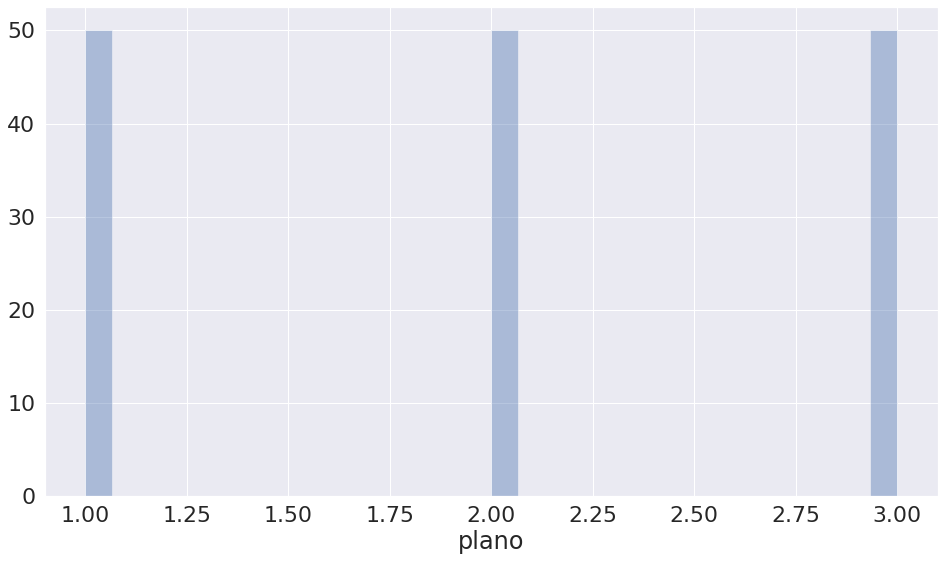

In [85]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.distplot(celular["plano"], bins=30, kde=False)

In [86]:
#Sperando os atributos
X = celular.iloc[:,:-1].values

In [87]:
#Separando o alvo
y = celular.iloc[:,4].values

In [88]:
#Separando a base de dados em base de treino e base de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [89]:
from sklearn import tree

In [90]:
#Ajustando o modelo
classificador_arvore = tree.DecisionTreeClassifier()
classificador_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

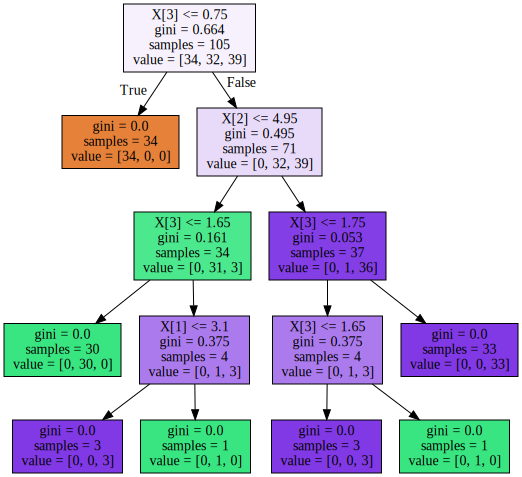

In [91]:
#Visualizando a árvore criada
import graphviz 
dot_data = tree.export_graphviz(classificador_arvore, filled=True, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [92]:
#Fazendo previsões a partir da base de testes
plano_previsto = classificador_arvore.predict(X_teste)

In [93]:
plano_previsto

array([3, 2, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2,
       1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3, 2, 2, 3, 1, 3, 1,
       1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


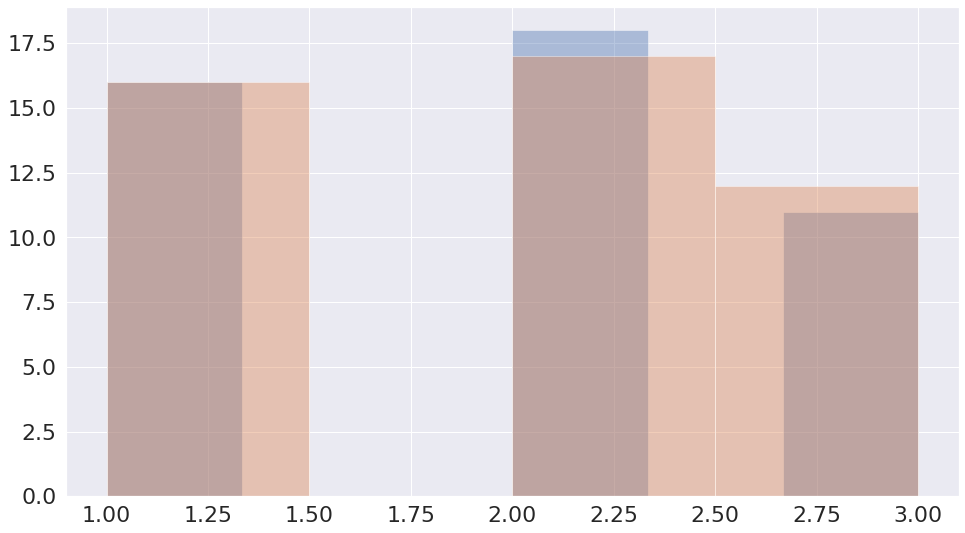

In [94]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto, bins=4, kde=False)

In [95]:
from sklearn.metrics import accuracy_score

In [96]:
#Teste de acurácia
accuracy_score(y_teste, plano_previsto)*100

97.77777777777777

## K Vizinhos mais próximos

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
#Ajustando o modelo aos dados
classificador_vizinho = KNeighborsClassifier(5)
classificador_vizinho.fit(X_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [113]:
plano_previsto_v = classificador_vizinho.predict(X_teste)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


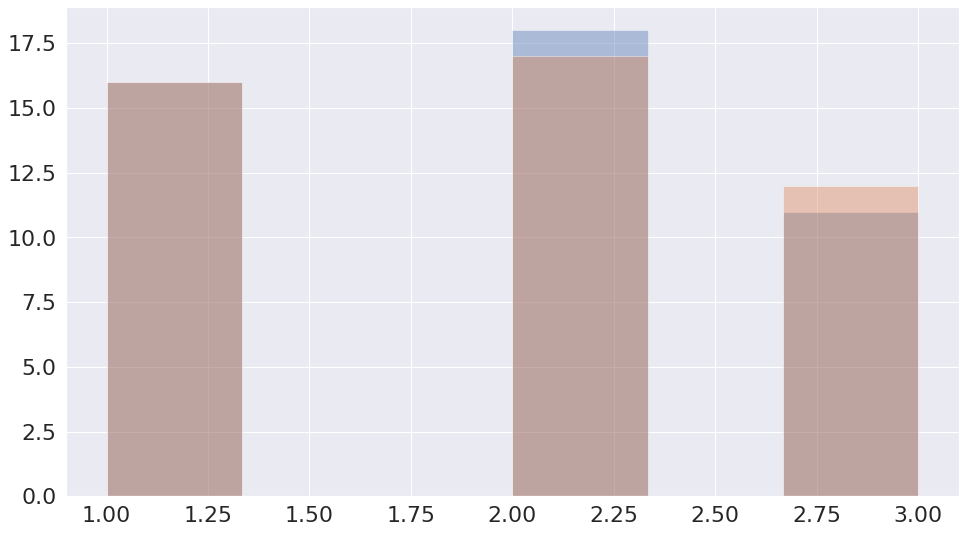

In [114]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.distplot(y_teste, bins=6, kde=False)
sns.distplot(plano_previsto_v, bins=6, kde=False)

## Medindo a acurácia

In [101]:
accuracy_score(y_teste, plano_previsto_v)*100

97.77777777777777

In [102]:
plano_previsto_v2 = classificador_vizinho.predict(X_treino)

In [103]:
accuracy_score(y_treino, plano_previsto_v2)*100

97.14285714285714

In [104]:
# Iniciando a estratificação cruzada
from sklearn.model_selection import RepeatedStratifiedKFold

In [105]:
skfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=0)

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
params = {'n_neighbors': [5]}

In [108]:
gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid= params, cv=skfold, 
                  verbose=1, scoring='accuracy', return_train_score=True)

In [109]:
gs.fit(X,y)

Fitting 100 folds for each of 1 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=10, random_state=0),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None, param_grid={'n_neighbors': [5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [110]:
#Resultado da estratificação cruzada
gs.cv_results_['mean_test_score']

array([0.964])